In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [54]:
ds_co = pd.read_csv('Combined Datasets/Co_final_test.csv')
ds_pt = pd.read_csv('Combined Datasets/Pt_final_test.csv')

In [55]:
ds_co.shape

(217624, 19)

In [56]:
ds_co = ds_co.iloc[:, 1:-2]
ds_pt = ds_pt.iloc[:, 1:-2]

<IPython.core.display.Javascript object>


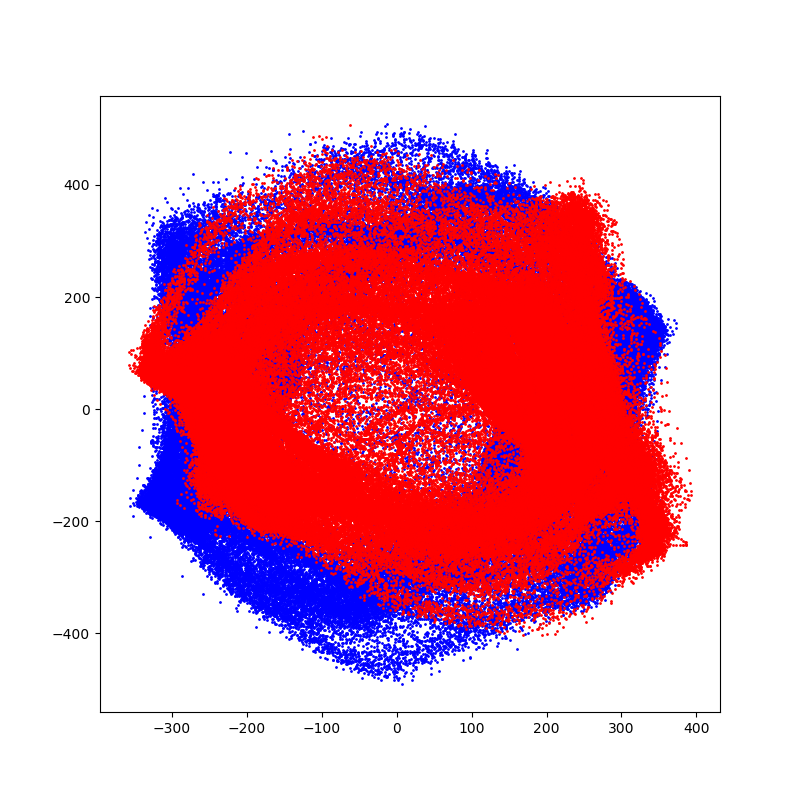

In [57]:
fig1, subaxes = plt.subplots(1, 1, figsize=(8,8))

pca1 = decomposition.PCA(n_components=2)
ds_co_poly_pca = pca1.fit_transform(ds_co)
ds_pt_poly_pca = pca1.fit_transform(ds_pt)
# ds_co_poly_pca = pca.transform(ds_co_poly)
subaxes.scatter(ds_co_poly_pca[:, 0], ds_co_poly_pca[:, 1],  c='blue' ,s=1)
subaxes.scatter(ds_pt_poly_pca[:, 0], ds_pt_poly_pca[:, 1],  c='red' ,s=1)


In [58]:
ds_co_poly_pca.shape

(217624, 2)

In [59]:
df_co = pd.DataFrame(ds_co_poly_pca)
df_pt = pd.DataFrame(ds_pt_poly_pca)


In [60]:
df_pca1 = pd.DataFrame(pca1.components_)
df_pca1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.167784,0.162123,0.141469,0.338502,0.192539,0.278186,0.405818,0.154334,-0.104911,-0.158513,-0.145249,-0.356184,-0.175507,-0.330251,-0.405532,-0.139929
1,0.527823,0.367277,0.289763,0.066933,-0.050527,-0.165345,-0.286899,-0.187684,-0.301157,-0.285097,-0.279261,-0.073762,-0.024808,0.142166,0.219419,0.162065


In [61]:
pd.DataFrame(pca1.components_).apply((lambda x: x.max()), axis=1)

0    0.405818
1    0.527823
dtype: float64

In [62]:
pd.DataFrame(pca1.components_).apply((lambda x: x.argmax()), axis=1)

0    6
1    0
dtype: int64

In [63]:
pca1.explained_variance_

array([ 41026.33752163,  19962.3130144 ])

<IPython.core.display.Javascript object>


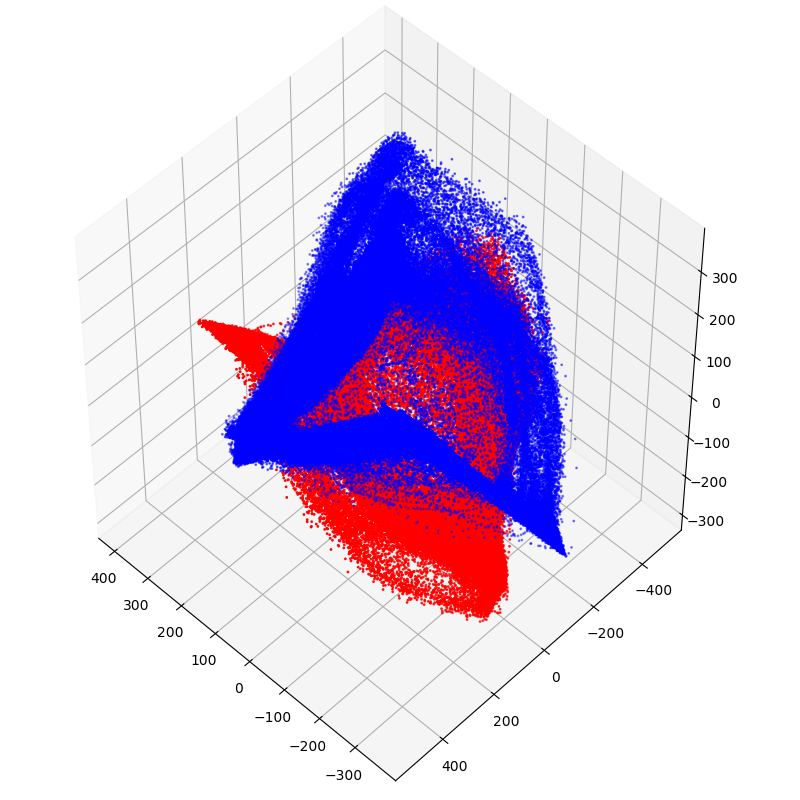

In [64]:
fig = plt.figure(figsize=(8,8))

subaxes1 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
pca = decomposition.PCA(n_components=3)
ds_co_poly_pca2 = pca.fit_transform(ds_co)
ds_pt_poly_pca2 = pca.fit_transform(ds_pt)

subaxes1.scatter(ds_co_poly_pca2[:, 0], ds_co_poly_pca2[:, 1], ds_co_poly_pca2[:, 2],  c='blue' ,s=1)
subaxes1.scatter(ds_pt_poly_pca2[:, 0], ds_pt_poly_pca2[:, 1], ds_pt_poly_pca2[:, 2],  c='red' ,s=1)



In [65]:
print(pca.explained_variance_ )

[ 41026.33752163  19962.3130144   10302.32478905]


In [66]:
ds_co.shape

(217624, 16)

In [67]:
df_co.to_csv('PCA/PCA_without_poly_Co_test.csv')
df_pt.to_csv('PCA/PCA_without_poly_Pt_test.csv')

In [68]:
df_pca1.to_csv('Significant2d/GaCo01_01GaPt03_01.csv')